In [1]:
import pandas as pd
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import requests

# Gathering

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [6]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [7]:
image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [8]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

In [9]:
all_tweet_data=[]
with open('tweet_json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        all_tweet_data.append(tweet)

In [10]:
all_tweet_data[0];


In [11]:
tweet_api=[]

for line in all_tweet_data:
    tweet_id=line['id']
    tweet_favorite_count=line['favorite_count']
    tweet_retweet_count=line['retweet_count']
    tweet_created_at=line['created_at']
    tweet_api.append({'id':tweet_id,
                 'favorite_count':tweet_favorite_count,
                 'retweet_count':tweet_retweet_count,
                 'created_at':tweet_created_at
                })
tweet_api=pd.DataFrame(tweet_api,columns=['id','favorite_count','retweet_count','created_at'])    

In [12]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 4 columns):
id                2334 non-null int64
favorite_count    2334 non-null int64
retweet_count     2334 non-null int64
created_at        2334 non-null object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [13]:
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [14]:
image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [15]:
tweet_api.head()

id  favorite_count  retweet_count  \
0  892420643555336193           37373           8073   
1  892177421306343426           32132           5991   
2  891815181378084864           24219           3961   
3  891689557279858688           40682           8238   
4  891327558926688256           38911           8918   

                       created_at  
0  Tue Aug 01 16:23:56 +0000 2017  
1  Tue Aug 01 00:17:27 +0000 2017  
2  Mon Jul 31 00:18:03 +0000 2017  
3  Sun Jul 30 15:58:51 +0000 2017  
4  Sat Jul 29 16:00:24 +0000 2017

# Assessing
	


In [16]:
twitter_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1664  682788441537560576                    NaN                  NaN   
2029  671855973984772097                    NaN                  NaN   
1035  744995568523612160                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
872   761371037149827077                    NaN                  NaN   

                      timestamp  \
1664  2016-01-01 05:00:24 +0000   
2029  2015-12-02 00:58:41 +0000   
1035  2016-06-20 20:49:19 +0000   
2332  2015-11-16 20:01:42 +0000   
872   2016-08-05 01:19:35 +0000   

                                                 source  \
1664  <a href="http://twitter.com/download/iphone" r...   
2029  <a href="http://twitter.com/download/iphone" r...   
1035  <a href="http://twitter.com/download/iphone" r...   
2332  <a href="http://twitter.com/download/iphone" r...   
872   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1664  Happy New Year from your fav holiday squad! 🎉 ...                  NaN   
2029  Remarkable dog here. Walks on back legs really...                  NaN   
1035  This is Abby. She got her face stuck in a glas...                  NaN   
2332  Look at this jokester thinking seat belt laws ...                  NaN   
872   RT @dog_rates: Oh. My. God. 13/10 magical af h...         7.116948e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
1664                       NaN                        NaN   
2029                       NaN                        NaN   
1035                       NaN                        NaN   
2332                       NaN                        NaN   
872               4.196984e+09  2016-03-20 23:23:54 +0000   

                                          expanded_urls  rating_numerator  \
1664  https://twitter.com/dog_rates/status/682788441...                12   
2029  https://twitter.com/dog_rates/status/671855973...                 8   
1035  https://twitter.com/dog_rates/status/744995568...                 9   
2332  https://twitter.com/dog_rates/status/666345417...                10   
872   https://twitter.com/dog_rates/status/711694788...                13   

      rating_denominator  name doggo floofer  pupper  puppo  
1664                  10  None  None    None  pupper   None  
2029                  10  None  None    None    None   None  
1035                  10  Abby  None    None    None  puppo  
2332                  10  None  None    None    None   None  
872                   10  None  None    None    None   None

In [17]:
image_prediction.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Bailey        7
an            7
Toby          7
Daisy         7
Buddy         7
Leo           6
Rusty         6
Milo          6
Jack          6
Dave          6
Koda          6
Stanley       6
Oscar         6
Jax           6
Bella         6
Scout         6
Phil          5
           ... 
Callie        1
Trip          1
Crouton       1
Timofy        1
Travis        1
Ebby          1
Augie         1
life          1
Mairi         1
Brockly       1
Jim           1
Beya          1
Pluto         1
Lizzie        1
Gordon        1
Tiger         1
Barney        1
Rhino         1
Freddery      1
Shelby        1
Pupcasso      1
Stefan        1
Cheryl        1
Hector        1
Dook          1
Marty         1
Siba          1
Grady         1
Mutt          1
Ralphy        1
Name: name, Length: 957,

In [20]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
twitter_archive.duplicated().sum()

0

In [23]:
image_prediction.duplicated().sum()

0

In [24]:
tweet_api.duplicated().sum()

0

In [25]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 4 columns):
id                2334 non-null int64
favorite_count    2334 non-null int64
retweet_count     2334 non-null int64
created_at        2334 non-null object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [104]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

# Cleaning
### Visual assessment
* 1-change None value in names to NaN
* 2-name column contain strange names like(a, an and O), replace it to NAN
* 3-source hard to read
* 4-retweet columns miss a lot of value, remove unimportant
columns(in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweet
ed_status_timestamp and expanded_urls)
* 5-change name of columns of id in tweet_api to tweet_id to match the other dataset
* 6-remove replay tweet and retweet

### Programmatical assessment
* 7-by counting the value in rating denominators seem the base number is 10 because there are 2333 count of 10 and 23
of other numbers which may be typing error
* 8-change type of “created_at” column in tweet_api from object to time

### Tidiness issues
* 1-make one columns for type of dog(doggo,floofer,pupper and puppo)
* 2-merge all dataset to one dataset named "twitter_archive_master"



In [360]:
twitter_archive2=twitter_archive.copy()
image_prediction2=image_prediction.copy()
tweet_api2=tweet_api.copy()             


**Define** <br>
1-change None value in names to NaN

**Code**

In [361]:
twitter_archive2.name.replace('None','NaN',inplace=True)

**Test**

In [362]:
twitter_archive2.name.value_counts()

NaN               745
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Penny              10
Lola               10
Tucker             10
Bo                  9
Winston             9
the                 8
Sadie               8
Toby                7
Daisy               7
Buddy               7
an                  7
Bailey              7
Stanley             6
Koda                6
Jax                 6
Bella               6
Leo                 6
Rusty               6
Milo                6
Dave                6
Oscar               6
Jack                6
Scout               6
Larry               5
very                5
Sammy               5
Finn                5
Louis               5
Phil                5
Alfie               5
Bentley             5
Gus                 5
George              5
Chester             5
Sunny               5
Oakley              5
Sampson             4
Boomer              4
Walter              4
Sophie    

**Define** <br>2-name column contain strange names like(a,an and O), replace it to NAN

**Code**

In [363]:
strange_name=['None','a','an','the','O']
twitter_archive2[twitter_archive2.name.isin(strange_name)]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
56    881536004380872706                    NaN                  NaN   
649   792913359805018113                    NaN                  NaN   
759   778396591732486144                    NaN                  NaN   
775   776201521193218049                    NaN                  NaN   
801   772581559778025472                    NaN                  NaN   
1002  747885874273214464                    NaN                  NaN   
1004  747816857231626240                    NaN                  NaN   
1017  746872823977771008                    NaN                  NaN   
1025  746369468511756288                    NaN                  NaN   
1049  743222593470234624                    NaN                  NaN   
1193  717537687239008257                    NaN                  NaN   
1207  715733265223708672                    NaN                  NaN   
1340  704859558691414016                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1361  703079050210877440                    NaN                  NaN   
1362  703041949650034688                    NaN                  NaN   
1368  702539513671897089                    NaN                  NaN   
1382  700864154249383937                    NaN                  NaN   
1499  692187005137076224                    NaN                  NaN   
1527  690360449368465409                    NaN                  NaN   
1603  685943807276412928                    NaN                  NaN   
1737  679530280114372609                    NaN                  NaN   
1785  677644091929329666                    NaN                  NaN   
1797  677269281705472000                    NaN                  NaN   
1815  676613908052996102                    NaN                  NaN   
1853  675706639471788032                    NaN                  NaN   
1854  675534494439489536                    NaN                  NaN   
1877  675109292475830276                    NaN                  NaN   
1878  675047298674663426                    NaN                  NaN   
1923  674082852460433408                    NaN                  NaN   
1941  673715861853720576                    NaN                  NaN   
1955  673636718965334016                    NaN                  NaN   
1994  672604026190569472                    NaN                  NaN   
2034  671743150407421952                    NaN                  NaN   
2037  671561002136281088                    NaN                  NaN   
2066  671147085991960577                    NaN                  NaN   
2116  670427002554466305                    NaN                  NaN   
2125  670361874861563904                    NaN                  NaN   
2128  670303360680108032                    NaN                  NaN   
2146  669923323644657664                    NaN                  NaN   
2153  669661792646373376                    NaN                  NaN   
2161  669564461267722241                    NaN                  NaN   
2191  668955713004314625                    NaN                  NaN   
2198  668815180734689280                    NaN                  NaN   
2204  668636665813057536                    NaN                  NaN   
2211  668614819948453888                    NaN                  NaN   
2212  668587383441514497                    NaN                  NaN   
2218  668507509523615744                    NaN                  NaN   
2222  668466899341221888                    NaN                  NaN   
2235  668171859951755264                    NaN                  NaN   
2249  667861340749471744                    NaN                  NaN   
2255  667773195014021121                    NaN                  NaN   
2264  667538891197542400                    NaN                  NaN   
2273  667470559035432960                    NaN                  NaN   
2287  667177989038297088                    NaN         

In [364]:
twitter_archive2.name.replace(['None','a','an','the','O'],'NaN',inplace=True)

**Test**

In [365]:
twitter_archive2[twitter_archive2.name.isin(strange_name)]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

**Define** <br>3-source hard to read

**Code**

In [366]:
twitter_archive2.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [367]:
twitter_archive2.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': "Twitter for iPhone",'<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': "Vine",'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': "Twitter Web",'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': "TweetDeck"},inplace=True)

**Test**

In [368]:
twitter_archive2.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web             33
TweetDeck               11
Name: source, dtype: int64

**Define** <br>4-remove replay tweet and retweet

**Code**

In [369]:
twitter_archive2.retweeted_status_id.isnull()

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19      False
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
30       True
31       True
32      False
33       True
34       True
35       True
36      False
37       True
38       True
39       True
40       True
41       True
42       True
43       True
44       True
45       True
46       True
47       True
48       True
49       True
50       True
51       True
52       True
53       True
54       True
55       True
56       True
57       True
58       True
59       True
60       True
61       True
62       True
63       True
64       True
65       True
66       True
67       True
68      False
69       True
70       True
71    

In [370]:
twitter_archive2=twitter_archive2[twitter_archive2.retweeted_status_id.isnull()]

**Test**

In [371]:
twitter_archive2.retweeted_status_id.notnull().sum()

0

**Define** <br>5-
remove unimportant columns(in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp and expanded_urls)

**Code**

In [372]:
 twitter_archive2.drop(['in_reply_to_user_id','in_reply_to_status_id','timestamp','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis=1,inplace=True)

**Test**

In [373]:
twitter_archive2.head()

tweet_id              source  \
0  892420643555336193  Twitter for iPhone   
1  892177421306343426  Twitter for iPhone   
2  891815181378084864  Twitter for iPhone   
3  891689557279858688  Twitter for iPhone   
4  891327558926688256  Twitter for iPhone   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

**Define** <br>6-by counting the value in rating_denominatoris seem the base number is 10 because there are 2333 count of 10 and 23 of other numbers which may be typing error

**Code**

In [374]:
twitter_archive2.rating_denominator=10

**Test**

In [375]:
twitter_archive2.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

**Define** <br>7-change type of 'created_at" column in tweet_api from object to datetime64

**Code**

In [376]:
tweet_api2['created_at']=pd.to_datetime(tweet_api2['created_at'])

**Test**

In [377]:
tweet_api2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 4 columns):
id                2334 non-null int64
favorite_count    2334 non-null int64
retweet_count     2334 non-null int64
created_at        2334 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 73.0 KB


**Define** <br>8-change name of columns of id in tweet_api to tweet_id to match the other dataset 

**Code**

In [378]:
tweet_api2.rename(columns={'id':'tweet_id'},inplace=True)

**Test**

In [379]:
tweet_api2.head()

tweet_id  favorite_count  retweet_count          created_at
0  892420643555336193           37373           8073 2017-08-01 16:23:56
1  892177421306343426           32132           5991 2017-08-01 00:17:27
2  891815181378084864           24219           3961 2017-07-31 00:18:03
3  891689557279858688           40682           8238 2017-07-30 15:58:51
4  891327558926688256           38911           8918 2017-07-29 16:00:24

**Define** <br>9-there are some worng number from extracting rating_numerator for example if the number is 12.26 it will extrace the rating_numerator as 26 insted of 12


**Code**

In [380]:
twitter_archive2.rating_numerator.describe()

count    2175.000000
mean       13.215172
std        47.725696
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [381]:
twitter_archive2.rating_numerator.value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [382]:
twitter_archive2.head()

tweet_id              source  \
0  892420643555336193  Twitter for iPhone   
1  892177421306343426  Twitter for iPhone   
2  891815181378084864  Twitter for iPhone   
3  891689557279858688  Twitter for iPhone   
4  891327558926688256  Twitter for iPhone   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [383]:
ratings = twitter_archive2.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings

0    1
0        13   10
1        13   10
2        12   10
3        13   10
4        12   10
5        13   10
6        13   10
7        13   10
8        13   10
9        14   10
10       13   10
11       13   10
12       13   10
13       12   10
14       13   10
15       13   10
16       12   10
17       13   10
18       13   10
20       12   10
21       13   10
22       14   10
23       13   10
24       13   10
25       12   10
26       13   10
27       13   10
28       13   10
29       12   10
30       12   10
31       13   10
33       12   10
34       13   10
35       14   10
37       13   10
38       12   10
39       13   10
40       13   10
41       14   10
42       13   10
43       12   10
44       12   10
45     13.5   10
46       13   10
47       13   10
48       13   10
49       12   10
50       13   10
51       13   10
52       13   10
53       12   10
54       13   10
55       17   10
56       14   10
57       12   10
58       13   10
59       12   10
60       12   10
61       12   10
62       11   10
63       13   10
64       14   10
65       12   10
66       13   10
67       12   10
69       11   10
70       13   10
71       13   10
72       13   10
75       13   10
76       14   10
77       13   10
79       12   10
80       13   10
81       12   10
82       12   10
83       14   10
84       13   10
85       13   10
86       13   10
87       13   10
88       13   10
89       12   10
90       12   10
92       13   10
93       12   10
94       13   10
96       13   10
98       12   10
99       12   10
100      13   10
102      13   10
103      12   10
104      13   10
105      12   10
106      13   10
107      12   10
108      12   10
110      14   10
111      13   10
112      11   10
113      10   10
114      13   10
115      13   10
116      13   10
117      14   10
119      13   10
120      13   10
121      12   10
122      13   10
123      14   10
125      13   10
126      12   10
127      12   10
128      13   10
129      12   10
131      13   10
133      13   10
134      12   10
135      13   10
136      12   10
138      13   10
139      13   10
140      13   10
141      14   10
142      12   10
143      13   10
144      13   10
145      13   10
147      12   10
148      12   10
149      14   10
150      13   10
151      13   10
152      11   10
153      13   10
154      13   10
156      13   10
157      13   10
158      12   10
161      13   10
162      13   10
163      12   10
164      14   10
166      12   10
167      13   10
168      13   10
169      12   10
170      13   10
172      13   10
173      13   10
174      12   10
175      12   10
176      13   10
177      13   10
178      13   10
179      12   10
181      12   10
183      12   10
184      14   10
186      14   10
187      14   10
188     420   10
189     666   10
190      13   10
191      13   10
192      13   10
193      12   10
196      12   10
197      13   10
198      13   10
199      14   10
200      11   10
201      12   10
202      13   10
203      13   10
205      12   10
206      12   10
207      13   10
208      13   10
209      14   10
210      12   10
213      11   10
214      14   10
215      13   10
216      11   10
217      13   10
218      13   10
219      11   10
220      12   10
221      12   10
223      12   10
224      11   10
225      13   10
226      12   10
227      12   10
228      11   10
229       6   10
232      10   10
233      12   10
234      13   10
235      12   10
236      12   10
237      11   10
238      11   10
239      13   10
240      13   10
241      11   10
242      13   10
243      13   10
244      12   10
245      13   10
246      12   10
248      13   10
249      12   10
251      13   10
252      12   10
253      13   10
254      11   10
255      12   10
256      13   10
257      12   10
258      11   10
259      13   10
261      13   10
262      12   10
263      13   10
264      12   10
265      12   10
267      12   10
268      14   10
269      12   10
270      13   10
271      12   10
274      10   1

In [384]:
twitter_archive2=pd.merge(twitter_archive2, ratings, left_index=True, right_index=True)

In [385]:
twitter_archive2.head()

tweet_id              source  \
0  892420643555336193  Twitter for iPhone   
1  892177421306343426  Twitter for iPhone   
2  891815181378084864  Twitter for iPhone   
3  891689557279858688  Twitter for iPhone   
4  891327558926688256  Twitter for iPhone   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name doggo floofer pupper puppo   0   1  
0                  10   Phineas  None    None   None  None  13  10  
1                  10     Tilly  None    None   None  None  13  10  
2                  10    Archie  None    None   None  None  12  10  
3                  10     Darla  None    None   None  None  13  10  
4                  10  Franklin  None    None   None  None  12  10

In [386]:
twitter_archive2.rename(columns={list(twitter_archive2)[10]:'new_rating_numerator'},inplace=True)
twitter_archive2.rename(columns={list(twitter_archive2)[11]:'new_rating_denominator'},inplace=True)


In [387]:
twitter_archive2.drop(columns=['rating_numerator','rating_denominator'],axis=1,inplace=True)

In [388]:
twitter_archive2['new_rating_numerator']=twitter_archive2['new_rating_numerator'].astype(float)
twitter_archive2['new_rating_denominator']=twitter_archive2['new_rating_denominator'].astype(float)

**Test**

In [389]:
twitter_archive2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                  2175 non-null int64
source                    2175 non-null object
text                      2175 non-null object
name                      2175 non-null object
doggo                     2175 non-null object
floofer                   2175 non-null object
pupper                    2175 non-null object
puppo                     2175 non-null object
new_rating_numerator      2175 non-null float64
new_rating_denominator    2175 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 186.9+ KB


In [390]:
twitter_archive2.head()

tweet_id              source  \
0  892420643555336193  Twitter for iPhone   
1  892177421306343426  Twitter for iPhone   
2  891815181378084864  Twitter for iPhone   
3  891689557279858688  Twitter for iPhone   
4  891327558926688256  Twitter for iPhone   

                                                text      name doggo floofer  \
0  This is Phineas. He's a mystical boy. Only eve...   Phineas  None    None   
1  This is Tilly. She's just checking pup on you....     Tilly  None    None   
2  This is Archie. He is a rare Norwegian Pouncin...    Archie  None    None   
3  This is Darla. She commenced a snooze mid meal...     Darla  None    None   
4  This is Franklin. He would like you to stop ca...  Franklin  None    None   

  pupper puppo  new_rating_numerator  new_rating_denominator  
0   None  None                  13.0                    10.0  
1   None  None                  13.0                    10.0  
2   None  None                  12.0                    10.0  
3   None  None                  13.0                    10.0  
4   None  None                  12.0                    10.0

In [391]:
twitter_archive2.new_rating_numerator.value_counts()

12.00      500
10.00      442
11.00      426
13.00      307
9.00       156
8.00        98
7.00        54
14.00       43
5.00        34
6.00        32
3.00        19
4.00        17
2.00         9
1.00         8
420.00       2
0.00         2
17.00        1
24.00        1
84.00        1
13.50        1
15.00        1
960.00       1
143.00       1
50.00        1
99.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
9.75         1
666.00       1
11.27        1
121.00       1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
80.00        1
Name: new_rating_numerator, dtype: int64

### tidness 


**Define** <br>
1-make one columns for type of dog(doggo,floofer,pupper and puppo)

**Code**

In [392]:
twitter_archive2.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

doggo  floofer  pupper  puppo  count
0   None     None    None   None   1831
1   None     None    None  puppo     24
2   None     None  pupper   None    224
3   None  floofer    None   None      9
4  doggo     None    None   None     75
5  doggo     None    None  puppo      1
6  doggo     None  pupper   None     10
7  doggo  floofer    None   None      1

In [393]:
twitter_archive2.doggo.replace('None', '', inplace=True)
twitter_archive2.floofer.replace('None', '', inplace=True)
twitter_archive2.pupper.replace('None', '', inplace=True)
twitter_archive2.puppo.replace('None', '', inplace=True)

In [394]:
twitter_archive2.head(1)

tweet_id              source  \
0  892420643555336193  Twitter for iPhone   

                                                text     name doggo floofer  \
0  This is Phineas. He's a mystical boy. Only eve...  Phineas                 

  pupper puppo  new_rating_numerator  new_rating_denominator  
0                               13.0                    10.0

In [395]:
twitter_archive2['stage'] = twitter_archive2.doggo + twitter_archive2.floofer + twitter_archive2.pupper + twitter_archive2.puppo
twitter_archive2.loc[twitter_archive2.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive2.loc[twitter_archive2.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive2.loc[twitter_archive2.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

**Test**

In [396]:
twitter_archive2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                  2175 non-null int64
source                    2175 non-null object
text                      2175 non-null object
name                      2175 non-null object
doggo                     2175 non-null object
floofer                   2175 non-null object
pupper                    2175 non-null object
puppo                     2175 non-null object
new_rating_numerator      2175 non-null float64
new_rating_denominator    2175 non-null float64
stage                     2175 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 203.9+ KB


In [397]:
twitter_archive2.stage.value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

**Define** <br>
2-merge all dataset to one dataset named "twitter_archive_master"

**Code**

In [398]:
twitter_archive_master=twitter_archive2.merge(image_prediction2,on='tweet_id').merge(tweet_api2,on='tweet_id')

**Test**

In [399]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1987
Data columns (total 25 columns):
tweet_id                  1988 non-null int64
source                    1988 non-null object
text                      1988 non-null object
name                      1988 non-null object
doggo                     1988 non-null object
floofer                   1988 non-null object
pupper                    1988 non-null object
puppo                     1988 non-null object
new_rating_numerator      1988 non-null float64
new_rating_denominator    1988 non-null float64
stage                     1988 non-null object
jpg_url                   1988 non-null object
img_num                   1988 non-null int64
p1                        1988 non-null object
p1_conf                   1988 non-null float64
p1_dog                    1988 non-null bool
p2                        1988 non-null object
p2_conf                   1988 non-null float64
p2_dog                    1988 non-null bool
p3

In [400]:
twitter_archive_master.head()

tweet_id              source  \
0  892420643555336193  Twitter for iPhone   
1  892177421306343426  Twitter for iPhone   
2  891815181378084864  Twitter for iPhone   
3  891689557279858688  Twitter for iPhone   
4  891327558926688256  Twitter for iPhone   

                                                text      name doggo floofer  \
0  This is Phineas. He's a mystical boy. Only eve...   Phineas                 
1  This is Tilly. She's just checking pup on you....     Tilly                 
2  This is Archie. He is a rare Norwegian Pouncin...    Archie                 
3  This is Darla. She commenced a snooze mid meal...     Darla                 
4  This is Franklin. He would like you to stop ca...  Franklin                 

  pupper puppo  new_rating_numerator  new_rating_denominator stage  \
0                               13.0                    10.0         
1                               13.0                    10.0         
2                               12.0                    10.0         
3                               13.0                    10.0         
4                               12.0                    10.0         

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       basset   

    p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0  0.097049   False               bagel  0.085851   False   
1  0.323581    True            Pekinese  0.090647    True   
2  0.716012    True            malamute  0.078253    True   
3  0.170278   False  Labrador_retriever  0.168086    True   
4  0.555712    True    English_springer  0.225770    True   

                            p3   p3_conf  p3_dog  favorite_count  \
0                       banana  0.076110   False           37373   
1                     papillon  0.068957    True           32132   
2                       kelpie  0.031379    True           24219   
3                      spatula  0.040836   False           40682   
4  German_short-haired_pointer  0.175219    True           38911   

   retweet_count          created_at  
0           8073 2017-08-01 16:23:56  
1           5991 2017-08-01 00:17:27  
2           3961 2017-07-31 00:18:03  
3           8238 2017-07-30 15:58:51  
4           8918 2017-07-29 16:00:24

In [401]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

### Analyze and Visualize

In [402]:
twitter_archive_master.p1.value_counts()

golden_retriever                  139
Labrador_retriever                 93
Pembroke                           88
Chihuahua                          79
pug                                54
chow                               41
Samoyed                            39
toy_poodle                         38
Pomeranian                         38
malamute                           29
cocker_spaniel                     27
French_bulldog                     25
Chesapeake_Bay_retriever           23
miniature_pinscher                 22
seat_belt                          21
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          18
teddy                              18
Eskimo_dog                         18
Maltese_dog                        18
Shetland_sheepdog                  18
beagle                             17
Rottweiler                         17
Shih-Tzu                           17
Cardigan                           17
Lakeland_ter

In [403]:
twitter_archive_master.describe()

tweet_id  new_rating_numerator  new_rating_denominator  \
count  1.988000e+03           1988.000000             1988.000000   
mean   7.356483e+17             12.236811               10.533702   
std    6.738220e+16             41.533719                7.331696   
min    6.660209e+17              0.000000                2.000000   
25%    6.758223e+17             10.000000               10.000000   
50%    7.083530e+17             11.000000               10.000000   
75%    7.873413e+17             12.000000               10.000000   
max    8.924206e+17           1776.000000              170.000000   

           img_num      p1_conf       p2_conf       p3_conf  favorite_count  \
count  1988.000000  1988.000000  1.988000e+03  1.988000e+03     1988.000000   
mean      1.203219     0.593235  1.344353e-01  6.037088e-02     8532.136821   
std       0.561246     0.271915  1.005591e-01  5.090261e-02    12548.589095   
min       1.000000     0.044333  1.011300e-08  1.740170e-10       75.000000   
25%       1.000000     0.362063  5.411538e-02  1.625145e-02     1834.750000   
50%       1.000000     0.587222  1.174550e-01  4.959335e-02     3852.500000   
75%       1.000000     0.844247  1.949772e-01  9.174633e-02    10630.750000   
max       4.000000     1.000000  4.880140e-01  2.734190e-01   161450.000000   

       retweet_count  
count    1988.000000  
mean     2568.992455  
std      4597.703810  
min        11.000000  
25%       574.500000  
50%      1233.000000  
75%      2922.750000  
max     81471.000000

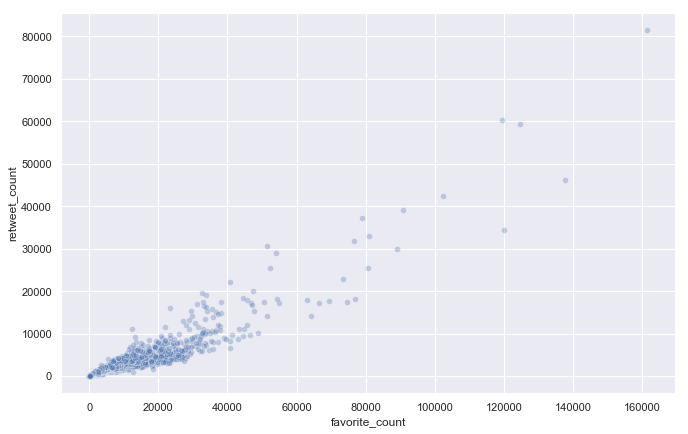

In [404]:
sns.scatterplot(data=twitter_archive_master,x='favorite_count',y='retweet_count',alpha=0.3)

In [405]:
twitter_archive_master[twitter_archive_master.favorite_count==75]

tweet_id              source  \
1971  666102155909144576  Twitter for iPhone   

                                                   text name doggo floofer  \
1971  Oh my. Here you are seeing an Adobe Setter giv...  NaN                 

     pupper puppo  new_rating_numerator  new_rating_denominator stage  \
1971                               11.0                    10.0         

                                              jpg_url  img_num  \
1971  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg        1   

                  p1   p1_conf  p1_dog            p2   p2_conf  p2_dog  \
1971  English_setter  0.298617    True  Newfoundland  0.149842    True   

          p3   p3_conf  p3_dog  favorite_count  retweet_count  \
1971  borzoi  0.133649    True              75             11   

              created_at  
1971 2015-11-16 03:55:04

In [406]:
pd.options.display.max_columns = None
twitter_archive_master[twitter_archive_master.favorite_count== 161450]

tweet_id              source  \
770  744234799360020481  Twitter for iPhone   

                                                  text name  doggo floofer  \
770  Here's a doggo realizing you can stand in a po...  NaN  doggo           

    pupper puppo  new_rating_numerator  new_rating_denominator  stage  \
770                               13.0                    10.0  doggo   

                                               jpg_url  img_num  \
770  https://pbs.twimg.com/ext_tw_video_thumb/74423...        1   

                     p1   p1_conf  p1_dog        p2   p2_conf  p2_dog  \
770  Labrador_retriever  0.825333    True  ice_bear  0.044681   False   

          p3   p3_conf  p3_dog  favorite_count  retweet_count  \
770  whippet  0.018442    True          161450          81471   

             created_at  
770 2016-06-18 18:26:18

In [407]:
twitter_archive_master.stage.value_counts()

                  1683
pupper             203
doggo               62
puppo               22
doggo, pupper        9
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [426]:
low_observation=['pupper','doggo','puppo','doggo, pupper','floofer']
twitter_archive_master=twitter_archive_master[twitter_archive_master.stage.isin(low_observation)]

C:\Users\shlazar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


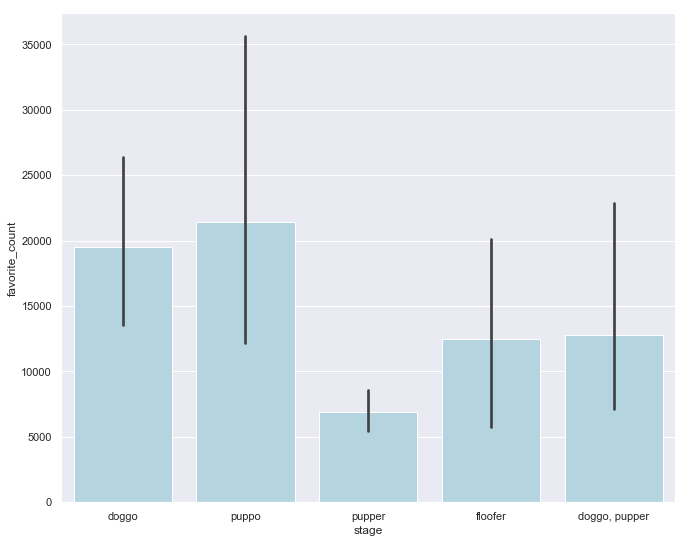

In [427]:
sns.set(rc={'figure.figsize':(11,9)})
sns.barplot(x="stage", y="favorite_count",color='lightblue', data=twitter_archive_master)

In [423]:
twitter_archive_master[twitter_archive_master.stage=='doggo, puppo']

tweet_id              source  \
147  855851453814013952  Twitter for iPhone   

                                                  text name  doggo floofer  \
147  Here's a puppo participating in the #ScienceMa...  NaN  doggo           

    pupper  puppo  new_rating_numerator  new_rating_denominator         stage  \
147         puppo                  13.0                    10.0  doggo, puppo   

                                             jpg_url  img_num  \
147  https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg        1   

                        p1   p1_conf  p1_dog                  p2   p2_conf  \
147  flat-coated_retriever  0.321676    True  Labrador_retriever  0.115138   

     p2_dog           p3  p3_conf  p3_dog  favorite_count  retweet_count  \
147    True  groenendael   0.0961    True           45526          17910   

             created_at  
147 2017-04-22 18:31:02

In [ ]:
twitter_archive_master.favorite_count.max()

In [409]:
twitter_archive_master['p1'].value_counts().head()

golden_retriever      139
Labrador_retriever     93
Pembroke               88
Chihuahua              79
pug                    54
Name: p1, dtype: int64

In [410]:
dogs=['golden_retriever','Labrador_retriever','Pembroke','Chihuahua','pug']


In [411]:
twitter_archive_master_p1=twitter_archive_master[twitter_archive_master['p1'].isin(dogs) ]

In [412]:
twitter_archive_master_p1

tweet_id              source  \
1     892177421306343426  Twitter for iPhone   
2     891815181378084864  Twitter for iPhone   
9     890240255349198849  Twitter for iPhone   
12    889665388333682689  Twitter for iPhone   
14    889531135344209921  Twitter for iPhone   
16    888917238123831296  Twitter for iPhone   
17    888804989199671297  Twitter for iPhone   
22    887473957103951883  Twitter for iPhone   
25    886983233522544640  Twitter for iPhone   
29    886258384151887873  Twitter for iPhone   
31    885528943205470208  Twitter for iPhone   
35    884562892145688576  Twitter for iPhone   
36    884441805382717440  Twitter for iPhone   
39    883482846933004288  Twitter for iPhone   
41    883117836046086144  Twitter for iPhone   
43    882762694511734784  Twitter for iPhone   
44    882627270321602560  Twitter for iPhone   
45    882268110199369728  Twitter for iPhone   
52    880872448815771648  Twitter for iPhone   
53    880465832366813184  Twitter for iPhone   
54    880221127280381952  Twitter for iPhone   
68    877201837425926144  Twitter for iPhone   
70    876484053909872640  Twitter for iPhone   
72    875747767867523072  Twitter for iPhone   
75    874680097055178752  Twitter for iPhone   
81    872967104147763200  Twitter for iPhone   
82    872820683541237760  Twitter for iPhone   
84    872486979161796608  Twitter for iPhone   
87    871762521631449091  Twitter for iPhone   
91    870656317836468226  Twitter for iPhone   
92    870374049280663552  Twitter for iPhone   
95    869772420881756160  Twitter for iPhone   
96    869702957897576449  Twitter for iPhone   
97    869596645499047938  Twitter for iPhone   
98    869227993411051520  Twitter for iPhone   
100   868622495443632128  Twitter for iPhone   
102   867900495410671616  Twitter for iPhone   
109   865718153858494464  Twitter for iPhone   
111   865006731092295680  Twitter for iPhone   
114   864197398364647424  Twitter for iPhone   
132   859851578198683649  Twitter for iPhone   
133   859607811541651456  Twitter for iPhone   
136   858843525470990336  Twitter for iPhone   
137   858471635011153920  Twitter for iPhone   
138   858107933456039936  Twitter for iPhone   
140   857746408056729600  Twitter for iPhone   
143   857029823797047296  Twitter for iPhone   
146   856282028240666624  Twitter for iPhone   
149   854732716440526848  Twitter for iPhone   
150   854482394044301312  Twitter for iPhone   
151   854365224396361728  Twitter for iPhone   
158   852672615818899456  Twitter for iPhone   
166   850753642995093505  Twitter for iPhone   
170   849776966551130114  Twitter for iPhone   
184   846514051647705089  Twitter for iPhone   
186   846042936437604353  Twitter for iPhone   
192   844973813909606400  Twitter for iPhone   
194   844223788422217728  Twitter for iPhone   
195   843856843873095681  Twitter for iPhone   
196   843604394117681152  Twitter for iPhone   
197   843235543001513987  Twitter for iPhone   
198   842846295480000512  Twitter for iPhone   
200   842535590457499648  Twitter for iPhone   
203   841680585030541313  Twitter for iPhone   
208   840632337062862849  Twitter for iPhone   
218   837820167694528512  Twitter for iPhone   
237   834209720923721728  Twitter for iPhone   
241   833826103416520705  Twitter for iPhone   
243   833479644947025920  Twitter for iPhone   
250   832273440279240704  Twitter for iPhone   
254   831670449226514432  Twitter for iPhone   
256   831552930092285952  Twitter for iPhone   
262   830583320585068544  Twitter for iPhone   
266   829449946868879360  Twitter for iPhone   
267   829141528400556032  Twitter for iPhone   
271   828650029636317184  Twitter for iPhone   
281   827600520311402496  Twitter for iPhone   
282   827324948884643840  Twitter for iPhone   
284   826958653328592898  Twitter for iPhone   
289   826204788643753985  Twitter for iPhone   
298   824325613288833024  Twitter for iPhone   
311   821886076407029760  Twitter for iPhone   
312   821765923262631936  Twitte

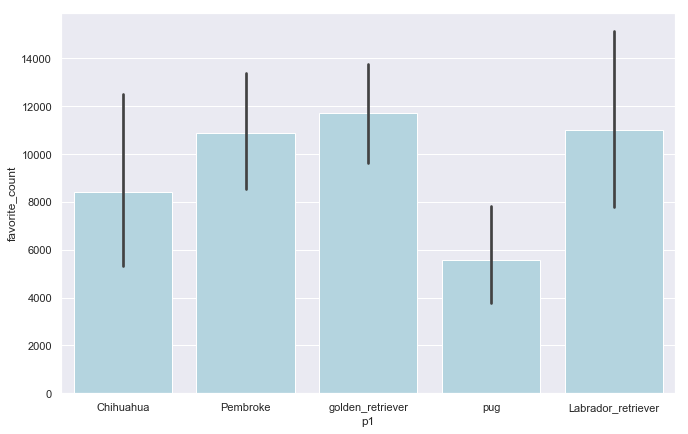

In [413]:
sns.barplot(x="p1", y="favorite_count",color='lightblue', data=twitter_archive_master_p1);

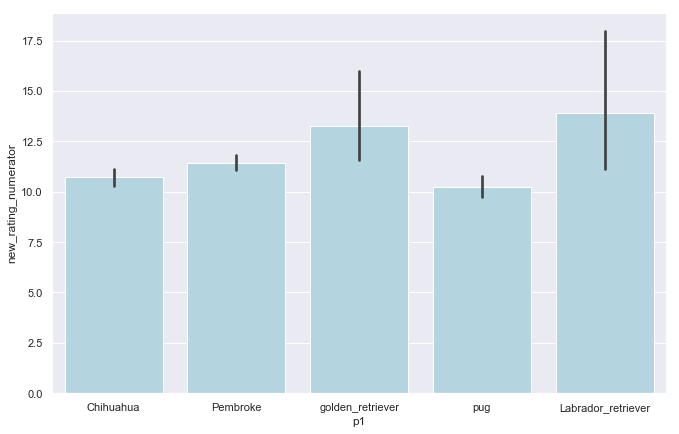

In [415]:
sns.barplot(x="p1", y="new_rating_numerator",color='lightblue', data=twitter_archive_master_p1);

In [417]:
twitter_archive_master_p1.groupby('p1').new_rating_numerator.mean()

p1
Chihuahua             10.708861
Labrador_retriever    13.924731
Pembroke              11.443182
golden_retriever      13.269784
pug                   10.240741
Name: new_rating_numerator, dtype: float64